In [11]:
import numpy as np
import dezero
from dezero import Model
from dezero.dataloaders import  SeqDataLoader
import dezero.functions as F
import dezero.layers as L
import matplotlib.pyplot as plt

In [2]:
max_epoch = 100
batch_size = 30
hidden_size = 100
bptt_length = 30

In [3]:
train_set = dezero.datasets.SinCurve(train=True)
dataloader = SeqDataLoader(train_set, batch_size=batch_size)
seqlen = len(train_set)

In [4]:
class BetterRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.LSTM(hidden_size)
        self.fc = L.Linear(out_size)
        
    def reset_state(self):
        self.rnn.reset_state()
        
    def forward(self, x):
        y = self.rnn(x)
        y = self.fc(y)
        return y

In [5]:
model = BetterRNN(hidden_size, 1)
optimizer = dezero.optimizers.Adam().setup(model)

In [6]:
for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0,0
    
    for x, t in dataloader:
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1
        
        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()
            
    avg_loss = float(loss.data) / count
    print("| epoch %d| loss %f"  % (epoch + 1, avg_loss))

| epoch 1| loss 0.704304
| epoch 2| loss 0.590504
| epoch 3| loss 0.488415
| epoch 4| loss 0.397891
| epoch 5| loss 0.318758
| epoch 6| loss 0.250831
| epoch 7| loss 0.193906
| epoch 8| loss 0.147741
| epoch 9| loss 0.111999
| epoch 10| loss 0.086164
| epoch 11| loss 0.069420
| epoch 12| loss 0.060543
| epoch 13| loss 0.057884
| epoch 14| loss 0.059488
| epoch 15| loss 0.063329
| epoch 16| loss 0.067591
| epoch 17| loss 0.070883
| epoch 18| loss 0.072365
| epoch 19| loss 0.071736
| epoch 20| loss 0.069125
| epoch 21| loss 0.064941
| epoch 22| loss 0.059728
| epoch 23| loss 0.054057
| epoch 24| loss 0.048441
| epoch 25| loss 0.043296
| epoch 26| loss 0.038918
| epoch 27| loss 0.035480
| epoch 28| loss 0.033041
| epoch 29| loss 0.031559
| epoch 30| loss 0.030910
| epoch 31| loss 0.030903
| epoch 32| loss 0.031305
| epoch 33| loss 0.031867
| epoch 34| loss 0.032364
| epoch 35| loss 0.032623
| epoch 36| loss 0.032546
| epoch 37| loss 0.032114
| epoch 38| loss 0.031371
| epoch 39| loss 0.03

In [7]:
xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []

In [8]:
with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))

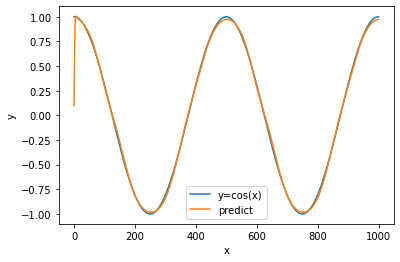

In [14]:
plt.plot(np.arange(len(xs)), xs, label="y=cos(x)")
plt.plot(np.arange(len(xs)), pred_list, label="predict")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()